# Projeto DL 2021 - Grupo Stonks

In [ ]:
# !pip install --upgrade tensorflow keras Pillow
# !pip install SciPy

In [15]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.__version__

'2.6.0'

## Parte 1 - Processamento dos dados

### Processar o Training set

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('img/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 80 images belonging to 4 classes.


### Processar o Test set

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.


## Parte 2 - Criação do CNN

In [19]:
cnn = tf.keras.models.Sequential()

### Passo 1 - Convolução e agrupamento

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [21]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 2 - Adicionar segunda e terceira camada de convolução

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Passo 3 - Redimensionar as camadas

In [23]:
cnn.add(tf.keras.layers.Flatten())

### Passo 4 - Conectar todas as camadas

In [24]:
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
cnn.add(tf.keras.layers.Dropout(0.1))

### Passo 5 - Camadas de saída

In [25]:
cnn.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

## Parte 3 - Treinamento do CNN

### Passo 1 - Compilar o CNN

In [26]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Passo 2 - Treinar o CNN no Training set e comparar com o Test set

In [27]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
3/3 [==============================] - 9s 2s/step - loss: 1.4715 - accuracy: 0.2000 - val_loss: 1.3858 - val_accuracy: 0.2000
Epoch 2/40
3/3 [==============================] - 7s 2s/step - loss: 1.3868 - accuracy: 0.2625 - val_loss: 1.3882 - val_accuracy: 0.2500
Epoch 3/40
3/3 [==============================] - 7s 2s/step - loss: 1.3894 - accuracy: 0.2125 - val_loss: 1.3806 - val_accuracy: 0.2500
Epoch 4/40
3/3 [==============================] - 7s 2s/step - loss: 1.3699 - accuracy: 0.2625 - val_loss: 1.3862 - val_accuracy: 0.3000
Epoch 5/40
3/3 [==============================] - 7s 3s/step - loss: 1.3655 - accuracy: 0.3250 - val_loss: 1.3773 - val_accuracy: 0.3500
Epoch 6/40
3/3 [==============================] - 7s 2s/step - loss: 1.3496 - accuracy: 0.3375 - val_loss: 1.3585 - val_accuracy: 0.3000
Epoch 7/40
3/3 [==============================] - 7s 2s/step - loss: 1.3180 - accuracy: 0.4375 - val_loss: 1.3269 - val_accuracy: 0.4000
Epoch 8/40
3/3 [=========================

# Matriz de confusão

In [ ]:
#!pip install sklearn
#!pip install matplotlib

/home/rafaella/.local/lib/python3.8/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


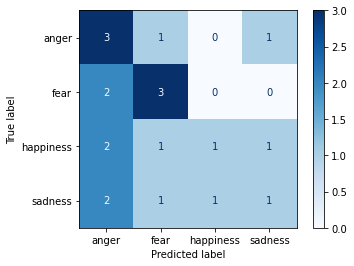

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Y_pred = cnn.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ["anger", "fear", "happiness", "sadness"]

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Part 4 - Making a single prediction

In [29]:
import numpy as np
from keras.preprocessing import image
percent = 0.8
emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3: 'sadness'}
test_image = image.load_img('img/single_prediction/raiva.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
max_value = max(result[0]) 
max_index = np.where(result[0] == max_value)
if max_value > percent:
    prediction = emotions[max_index[0][0]]
else:
    prediction = 'Não identificado'

In [30]:
prediction

'fear'

In [31]:
max_value

0.99909353

## Fim